In [1]:
import Dataset
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
import mpld3
import pickle
import os
from pathlib import Path
mpld3.enable_notebook()

plt.style.use("~/evanstyle.mplstyle")

In [ ]:
topdir = "/home/esiii_lxe/HV-test/8-16-21/cosmics-overnight/"
d = Dataset.Dataset(topdir)
#load dataset raw data, parsing the files
file_prefixes = ["pmt", "anode"]
date_of_dataset = "8-16-21"
n_evts_per_file = 20000
n_evts_total = 100000
event_ranges = [[i*n_evts_per_file, (i+1)*n_evts_per_file] for i in range(int(n_evts_total/n_evts_per_file))]

for i, evtlim in enumerate(event_ranges):
    d.load_raw(file_prefixes, date_of_dataset, event_limit=evtlim)
    #d.print_timestamps_sidebyside(5)
    d.create_wave_df(time_paired=False)
    #if the folders don't exist, create them.
    Path(topdir+"processed/").mkdir(parents=True, exist_ok=True)
    pickle.dump([d], open(topdir+"processed/9-15-21_" + str(i).zfill(3) + ".p", "wb"))


Looking through files in directory /home/esiii_lxe/HV-test/8-16-21/cosmics-overnight/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix pmt
Done: found 70881


Selecting files with prefix anode
Done: found 26884


Limiting the number of events to the chronological range: [0, 20000]
Pairing by their acquisition order. Not time synchronized


  0%|          | 0/20000 [00:00<?, ?it/s]

Parsing waveform data from files:   0%|          | 0/20000 [00:00<?, ?it/s]

Finished filling a dataframe with 20000 waveform events


In [25]:
topdir = "/home/esiii_lxe/HV-test/8-16-21/cosmics-overnight/processed/"
file_list = [f for f in os.listdir(topdir) if os.path.isfile(os.path.join(topdir, f)) and f.endswith('.p') and f[:4]=="9-15"]
print(file_list)

['9-15-21_002.p', '9-15-21_000.p', '9-15-21_001.p', '9-15-21_004.p', '9-15-21_003.p']


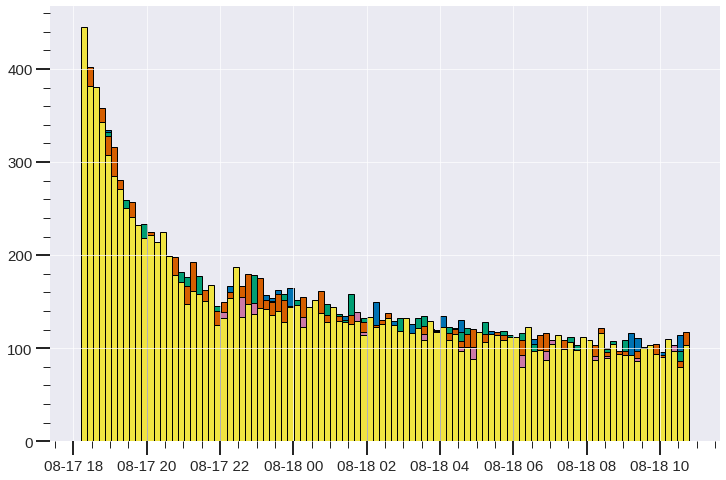

In [26]:
#plot differential rate based on timestamps

fig, ax = plt.subplots(figsize=(12, 8))
for f in file_list:
    d = pickle.load(open(topdir+f, "rb"))[0]
    sep_ts = d.get_separated_timestamps()
    ax.hist(sep_ts["pmt"])
    
plt.show()